In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense,  LSTM, Dropout
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_hujan = pd.read_csv('/content/drive/MyDrive/Dataset/curah-hujan-2018-new.csv')
df_yield = pd.read_csv('/content/drive/MyDrive/Dataset/hasil-panen-2018-new.csv')

In [ ]:
df_hujan

,Tahun,Bulan,curah hujan (mm)
0,2018,Januari,296.10
1,2018,Februari,273.90
2,2018,Maret,250.60
3,2018,April,177.30
4,2018,Mei,41.30
5,2018,Juni,0.00
6,2018,Juli,0.00
7,2018,Agustus,0.00
8,2018,September,133.30
9,2018,Oktober,142.00


In [ ]:
df_yield

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg)
0,2018,Januari,43573.0,449.24,2781.16
1,2018,Februari,43573.0,16598.03,102755.27
2,2018,Maret,43573.0,9352.41,57899.01
3,2018,April,43573.0,2512.02,15551.44
4,2018,Mei,43573.0,9882.90,57103.19
5,2018,Juni,43573.0,7680.37,44377.02
6,2018,Juli,43573.0,3594.00,20766.00
7,2018,Agustus,43573.0,1793.23,10361.25
8,2018,September,43573.0,2663.34,18230.62
9,2018,Oktober,43573.0,1703.87,11663.03


In [ ]:
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
data = pd.merge(df_panen_baru, df_hujan, on=['Tahun', 'Bulan'])

df_panen_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tahun                    60 non-null     int64  
 1   Bulan                    60 non-null     object 
 2   Luas Lahan               60 non-null     float64
 3   Luas Panen (ha)          60 non-null     float64
 4   Produksi Padi (ton/gkg)  60 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,Januari,43573.0,449.24,2781.16,296.10
1,2018,Februari,43573.0,16598.03,102755.27,273.90
2,2018,Maret,43573.0,9352.41,57899.01,250.60
3,2018,April,43573.0,2512.02,15551.44,177.30
4,2018,Mei,43573.0,9882.90,57103.19,41.30
5,2018,Juni,43573.0,7680.37,44377.02,0.00
6,2018,Juli,43573.0,3594.00,20766.00,0.00
7,2018,Agustus,43573.0,1793.23,10361.25,0.00
8,2018,September,43573.0,2663.34,18230.62,133.30
9,2018,Oktober,43573.0,1703.87,11663.03,142.00


In [ ]:
data.shape

(60, 6)

In [ ]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,Januari,43573.0,449.24,2781.16,296.10
1,2018,Februari,43573.0,16598.03,102755.27,273.90
2,2018,Maret,43573.0,9352.41,57899.01,250.60
3,2018,April,43573.0,2512.02,15551.44,177.30
4,2018,Mei,43573.0,9882.90,57103.19,41.30
5,2018,Juni,43573.0,7680.37,44377.02,0.00
6,2018,Juli,43573.0,3594.00,20766.00,0.00
7,2018,Agustus,43573.0,1793.23,10361.25,0.00
8,2018,September,43573.0,2663.34,18230.62,133.30
9,2018,Oktober,43573.0,1703.87,11663.03,142.00


## Ganti Bulan Ke angka

In [ ]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [ ]:
data['Bulan'] = data['Bulan'].map(month_mapping)

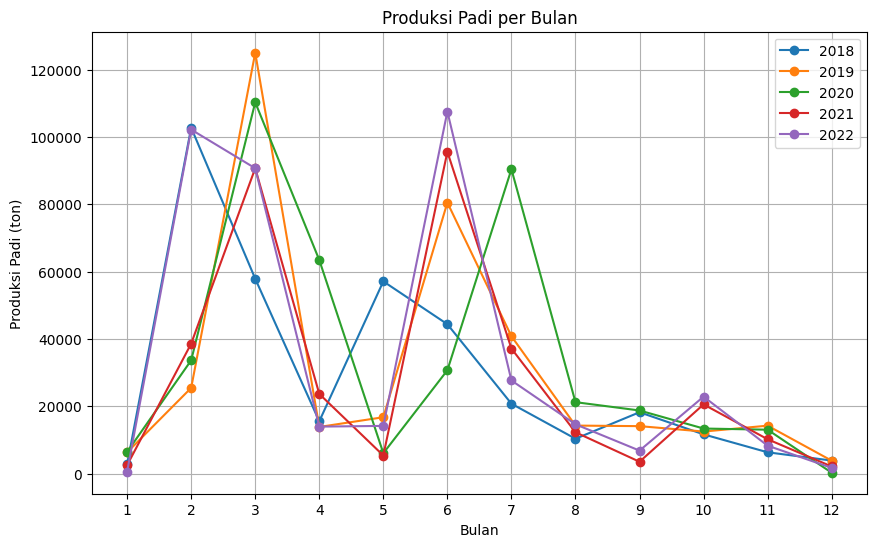

In [ ]:
# Plotting time series untuk Produksi Padi
plt.figure(figsize=(10, 6))
for year in data['Tahun'].unique():
    data_year = data[data['Tahun'] == year]
    plt.plot(data_year['Bulan'], data_year['Produksi Padi (ton/gkg)'], marker='o', linestyle='-', label=str(year))

plt.title('Produksi Padi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Produksi Padi (ton)')
plt.grid(True)
plt.xticks(data['Bulan'].unique())  # Menampilkan label bulan
plt.legend()
plt.show()

In [ ]:
data.shape

(60, 6)

In [ ]:
data.dtypes

Tahun                        int64
Bulan                        int64
Luas Lahan                 float64
Luas Panen (ha)            float64
Produksi Padi (ton/gkg)    float64
curah hujan (mm)           float64
dtype: object

In [ ]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,1,43573.0,449.24,2781.16,296.10
1,2018,2,43573.0,16598.03,102755.27,273.90
2,2018,3,43573.0,9352.41,57899.01,250.60
3,2018,4,43573.0,2512.02,15551.44,177.30
4,2018,5,43573.0,9882.90,57103.19,41.30
5,2018,6,43573.0,7680.37,44377.02,0.00
6,2018,7,43573.0,3594.00,20766.00,0.00
7,2018,8,43573.0,1793.23,10361.25,0.00
8,2018,9,43573.0,2663.34,18230.62,133.30
9,2018,10,43573.0,1703.87,11663.03,142.00


# Split

In [ ]:
## Parameter/Fitur
X = data[['Bulan', 'curah hujan (mm)', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton/gkg)']

In [ ]:
n_split = int(len(X) * .8)
X = data.iloc [:n_split, :-2].values
y= data.iloc [:n_split, -2].values
Xtest=data.iloc[n_split:, :-2].values
ytest=data.iloc[n_split:, -2].values

In [ ]:
X = X.reshape((X.shape[0], 1, X.shape[1]))
Xtest = Xtest.reshape((Xtest.shape[0], 1, Xtest.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=250, batch_size=6, validation_data=(Xtest, ytest), verbose=1)

predictions = model.predict(Xtest)
predictions

Epoch 1/250
8/8 [==============================] - 2s 48ms/step - loss: 2002446464.0000 - val_loss: 2682285312.0000
Epoch 2/250
8/8 [==============================] - 0s 8ms/step - loss: 1992926208.0000 - val_loss: 2673734400.0000
Epoch 3/250
8/8 [==============================] - 0s 9ms/step - loss: 1983987840.0000 - val_loss: 2665305856.0000
Epoch 4/250
8/8 [==============================] - 0s 8ms/step - loss: 1975693952.0000 - val_loss: 2656486144.0000
Epoch 5/250
8/8 [==============================] - 0s 6ms/step - loss: 1967056256.0000 - val_loss: 2647435776.0000
Epoch 6/250
8/8 [==============================] - 0s 8ms/step - loss: 1958822528.0000 - val_loss: 2637729792.0000
Epoch 7/250
8/8 [==============================] - 0s 8ms/step - loss: 1949250560.0000 - val_loss: 2628193024.0000
Epoch 8/250
8/8 [==============================] - 0s 6ms/step - loss: 1941029248.0000 - val_loss: 2617012224.0000
Epoch 9/250
8/8 [==============================] - 0s 8ms/step - loss: 19300044

array([[ 9378.076],
       [95326.586],
       [91482.68 ],
       [13336.457],
       [13396.137],
       [97098.7  ],
       [17395.492],
       [13536.496],
       [11220.923],
       [15979.257],
       [11655.746],
       [ 9695.206]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Evaluasi model
mse = mean_squared_error(ytest, predictions)

mae = mean_absolute_error(ytest, predictions)

mape = mean_absolute_percentage_error(ytest,predictions)

r2 = r2_score(ytest, predictions)

rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 40273256.36487851
Root Mean Squared Error (RMSE): 6346.121363863011
Mean Absolute Error (MAE): 5189.3969108072915
Mean Absolute Error (MAPE): 1.7432293243348542
r2 Score: 0.9733919641988545


<Figure size 640x480 with 0 Axes>

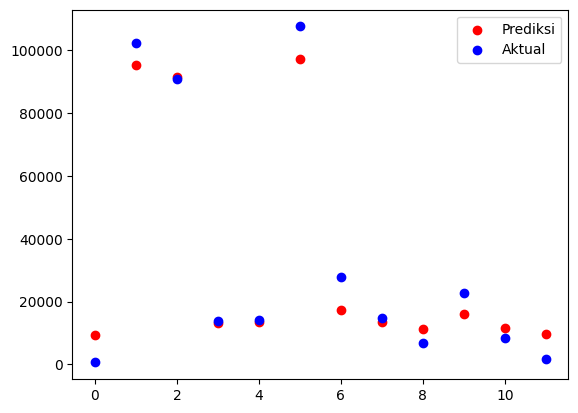

<Figure size 640x480 with 0 Axes>

In [ ]:
a1 = range(len(Xtest))
plt.scatter(a1, predictions, color='red')
plt.scatter(a1, ytest, color='blue')
plt.legend(["Prediksi", "Aktual"], loc ="upper right")
plt.figure()

In [ ]:
residual = ytest - predictions.flatten()
print("\nResidual " ,residual)


Residual  [-8759.44617188  6867.9240625   -778.9596875    628.87296875
   780.97328125 10452.566875   10273.5278125   1118.64390625
 -4384.15285156  6884.09316406 -3351.50609375 -7992.09605469]


In [ ]:
svm_model = SVR(kernel='linear', verbose=True, C=50)
svm_model.fit(residual.reshape(-1,1), ytest)
svm_predictions = svm_model.predict(residual.reshape(-1,1))
svm_predictions

[LibSVM]

array([  545.99991107, 22872.98892808, 11947.80529523, 13959.19069013,
       14176.49801418, 27994.40599847, 27738.61099648, 14658.93160486,
        6797.02771997, 22896.08989262,  8272.38105607,  1642.32113433])

In [ ]:
svm_predictions=svm_predictions.reshape(-1,1)

In [ ]:
svm_predictions

array([[  545.99991107],
       [22872.98892808],
       [11947.80529523],
       [13959.19069013],
       [14176.49801418],
       [27994.40599847],
       [27738.61099648],
       [14658.93160486],
       [ 6797.02771997],
       [22896.08989262],
       [ 8272.38105607],
       [ 1642.32113433]])

In [ ]:
hybrid_predictions = predictions + svm_predictions
hybrid_predictions

array([[  9924.07608294],
       [118199.57486558],
       [103430.48498273],
       [ 27295.64772138],
       [ 27572.63473293],
       [125093.10912347],
       [ 45134.10318398],
       [ 28195.42769861],
       [ 18017.95057153],
       [ 38875.34672856],
       [ 19928.12714982],
       [ 11337.52718901]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(ytest, hybrid_predictions)

mae = mean_absolute_error(ytest, hybrid_predictions)

mape = mean_absolute_percentage_error(ytest,hybrid_predictions)

r2 = r2_score(ytest, hybrid_predictions)

rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 188940471.2644178
Root Mean Squared Error (RMSE): 13745.561875180578
Mean Absolute Error (MAE): 13480.150835877275
Mean Absolute Error (MAPE): 2.362423465284299
r2 Score: 0.8751693983188021


<Figure size 640x480 with 0 Axes>

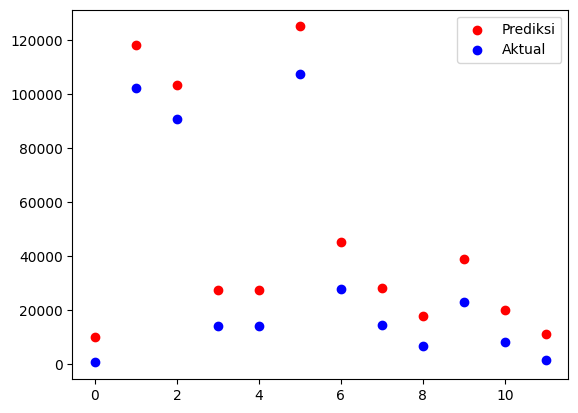

<Figure size 640x480 with 0 Axes>

In [ ]:
a1 = range(len(Xtest))
plt.scatter(a1, hybrid_predictions, color='red')
plt.scatter(a1, ytest, color='blue')
plt.legend(["Prediksi", "Aktual"], loc ="upper right")
plt.figure()

# Hasil Prediksi

In [ ]:
print(f"Hasil Prediksi: {hybrid_predictions} ton/gkg")

Hasil Prediksi: [[  9924.07608294]
 [118199.57486558]
 [103430.48498273]
 [ 27295.64772138]
 [ 27572.63473293]
 [125093.10912347]
 [ 45134.10318398]
 [ 28195.42769861]
 [ 18017.95057153]
 [ 38875.34672856]
 [ 19928.12714982]
 [ 11337.52718901]] ton/gkg


In [ ]:
for prediksi in hybrid_predictions:
    print(f"Hasil Prediksi: {prediksi[0]} ton/gkg")

Hasil Prediksi: 9924.076082941509 ton/gkg
Hasil Prediksi: 118199.57486557624 ton/gkg
Hasil Prediksi: 103430.4849827256 ton/gkg
Hasil Prediksi: 27295.647721376634 ton/gkg
Hasil Prediksi: 27572.63473292849 ton/gkg
Hasil Prediksi: 125093.10912346504 ton/gkg
Hasil Prediksi: 45134.103183981395 ton/gkg
Hasil Prediksi: 28195.42769860885 ton/gkg
Hasil Prediksi: 18017.950571533656 ton/gkg
Hasil Prediksi: 38875.34672855995 ton/gkg
Hasil Prediksi: 19928.127149816966 ton/gkg
Hasil Prediksi: 11337.52718901298 ton/gkg
